In [138]:
# observations
# 1) Tweets look pretty even on the scatter plot with one exception- CBS has way more positive tweets.
# 2) A lot of tweets are completely neutral. This is sometimes because a tweet with a link can often have few connotative words.
# 3) Fox News seems to have the most negative tweets of the bunch.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

consumer_key = "gHLqjBEtV9FwPEYoPY7reAyvL"
consumer_secret = "gMAfuuI13GCSKGZxO3PF9ZR5sDFTghq44Uuw3Ece5hs9OTSC9z"
access_token = "977543336377581568-xnRHASGqgdszCGzvHgYquWL2hjkEXZS"
access_token_secret = "ZYZz0sorPDL3tuafQWCEDWIDAn4uqi0c8gszGq7HefTLS"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [139]:
sentiments = []
target_list = ["@BBC", "@CBS", "@CNN", "@FoxNews", "@NYTimes"]

In [140]:
for user in target_list:
    counter = 1
    for page in range(5):
        tweets = api.user_timeline(user,page=page+1)
        for tweet in tweets:
            com = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            tweets_ago = counter
            sentiments.append({"Date": tweet["created_at"],
                               "User": user,
                               "Text": tweet["text"],
                               "Compound": com,
                               "Positive": pos,
                               "Neutral": neu,
                               "Negative": neg,
                               "Tweets Ago": counter})
            counter = counter + 1

In [141]:
sent_df = pd.DataFrame.from_dict(sentiments)
sent_df = sent_df[["User","Date","Tweets Ago","Compound","Positive","Neutral","Negative","Text"]]
sent_df.to_csv("output.csv")
sent_df.head()

,User,Date,Tweets Ago,Compound,Positive,Neutral,Negative,Text
0,@BBC,Mon Apr 02 20:02:08 +0000 2018,1,0.0000,0.000,1.000,0.0,Delve into the world of @agathachristie with B...
1,@BBC,Mon Apr 02 19:23:07 +0000 2018,2,0.0000,0.000,1.000,0.0,When this woman visited an uninhabited Caribbe...
2,@BBC,Mon Apr 02 19:02:04 +0000 2018,3,0.1531,0.103,0.897,0.0,"In a revealing and emotional journey, @LennyHe..."
3,@BBC,Mon Apr 02 18:45:06 +0000 2018,4,0.5423,0.163,0.837,0.0,A fictionalised account of how Dave Allen beca...
4,@BBC,Mon Apr 02 17:08:03 +0000 2018,5,0.0000,0.000,1.000,0.0,Would you try a blue cheese and pear ice cream...


In [142]:
BBC_df = sent_df.groupby(["User"]).get_group("@BBC")
CBS_df = sent_df.groupby(["User"]).get_group("@CBS")
CNN_df = sent_df.groupby(["User"]).get_group("@CNN")
FOX_df = sent_df.groupby(["User"]).get_group("@FoxNews")
NYT_df = sent_df.groupby(["User"]).get_group("@NYTimes")

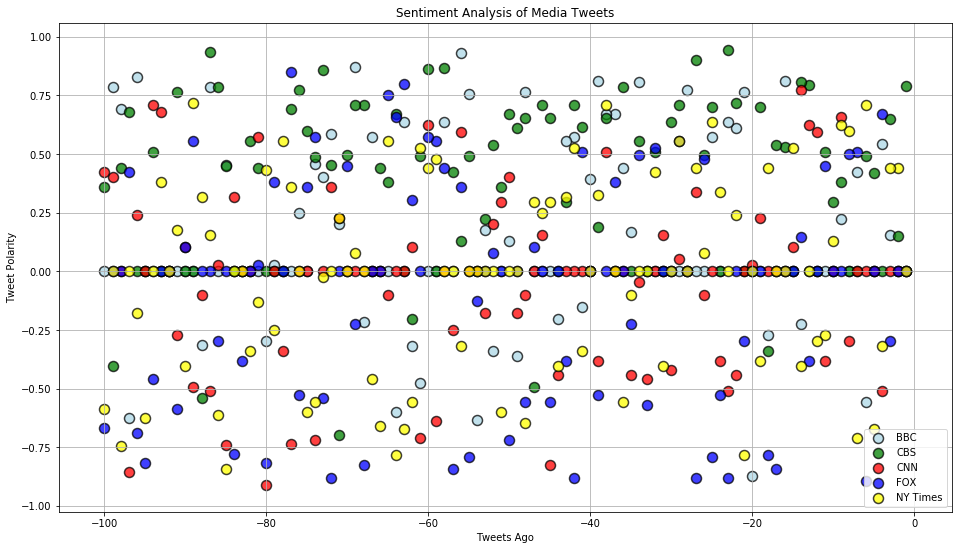

In [143]:
plt.figure(figsize=(16,9))
plt.scatter(-BBC_df["Tweets Ago"],BBC_df["Compound"],marker="o",linewidth=1.5,color="lightblue", edgecolors="black", alpha=.75, s = 100)
plt.scatter(-CBS_df["Tweets Ago"],CBS_df["Compound"],marker="o",linewidth=1.5,color="green", edgecolors="black", alpha=.75, s = 100)
plt.scatter(-CNN_df["Tweets Ago"],CNN_df["Compound"],marker="o",linewidth=1.5,color="red", edgecolors="black", alpha=.75, s = 100)
plt.scatter(-FOX_df["Tweets Ago"],FOX_df["Compound"],marker="o",linewidth=1.5,color="blue", edgecolors="black", alpha=.75, s = 100)
plt.scatter(-NYT_df["Tweets Ago"],NYT_df["Compound"],marker="o",linewidth=1.5,color="yellow", edgecolors="black", alpha=.75, s = 100)
plt.grid(which="both",b="true")
plt.title("Sentiment Analysis of Media Tweets")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.legend(labels=["BBC","CBS","CNN","FOX","NY Times"])
plt.savefig("sent_scatter.png")
plt.show()

In [144]:
data = pd.DataFrame([BBC_df["Compound"].mean(),CBS_df["Compound"].mean(),CNN_df["Compound"].mean(),FOX_df["Compound"].mean(),NYT_df["Compound"].mean()])
data=data.reset_index()
data.columns = ["Company","Score"]
data["Company"]=["BBC","CBS","CNN","FOX","NYT"]

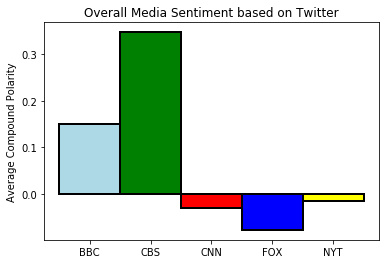

In [145]:
plt.bar(data["Company"], color=["lightblue","green","red","blue","yellow"], height=data["Score"], linewidth=2,
       edgecolor="black", width=1)
plt.ylabel("Average Compound Polarity")
plt.title("Overall Media Sentiment based on Twitter")
plt.savefig("sent_bar.png")
plt.show()